$$
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}} \; } %note : Argmin with a "A" means a set (several solutions) whilst "argmin" is a unique solution.
\newcommand{\Argmin}[1]{\underset{#1}{\operatorname{Argmin}} \; }
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}} \; }
\newcommand{\amin}[2]{\underset{#1}{\operatorname{argmin}} \; \left\{ #2 \right\} }
\newcommand{\amax}[2]{\underset{#1}{\operatorname{argmax}} \; \left\{ #2 \right\} }
\newcommand{\braket}[2]{\left\langle #1 \, , \, #2 \right\rangle}
\newcommand{\id}{\operatorname{Id}}
\newcommand{\norm}[1]{\left\| #1 \right\|}
\newcommand{\mmax}[2]{\max_{#1}\left\{ #2 \right\}}
\newcommand{\mmin}[2]{\min_{#1}\left\{ #2 \right\}}
\newcommand{\conv}{\ast}
\newcommand{\ft}[1]{\mathcal{F}\left( #1 \right)}
\newcommand{\ift}[1]{\mathcal{F}^{-1}\left( #1 \right)}
\newcommand{\pmat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\bmat}[1]{\begin{bmatrix} #1 \end{bmatrix}}
\newcommand{\prox}[2]{\operatorname{prox}_{#1}{\left(#2\right)}}
\newcommand{\proj}[2]{\operatorname{Proj}_{#1}{\left(#2\right)}}
\newcommand{\sign}[1]{\operatorname{sign}\left( #1 \right)}
\newcommand{\setR}{\mathbb{R}}
\newcommand{\setN}{\mathbb{N}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\K}{\mathcal{K}}
\newcommand{\W}{\mathcal{W}}
$$


# Computation of coherence for some operators

let
$$
y = A x + n
$$
be the acquisition process, where $y$ is the acquired signal, $x$ is the latent signal to recover, and $n$ is some additive noise.

Compressed sensing (CS) entails to solve
$$
\amin{x}{\frac{1}{2} \norm{A x - y}_2^2 + \lambda \norm{D x}_1}
$$
where $D$ is some sparsifying transform.

The fundamental ingredients of CS are [1]:
   * Sparsity: the latent signal $x$ has to be sparse in some representation basis $D$.
   * Random measurement. The acquired signal $y = A x$ is never a complete measurement, but rather an undersampled measurement $y = U A_0 x$ where $U$ is an undersampling operator and $A_0$ is an idealized operator (eg. continuous transform). A random undersampling dramatically improves the reconstruction capabilities.
   * Incoherence between the probes $A$ and the representation basis $D$

The incoherence is a way to determine if the Restricted Isometry Property (RIP) holds. The RIP a sufficient condition for a successful CS recovery. Two metrics are mainly used to measure incoherence.

The first metric is the basic definition of coherence $\mu(A, D)$ between basis $A$ and $D$ [1]:
$$
\mu(A, D) = \sqrt{N} \mmax{i, j}{ \frac{\left|\braket{A_i}{D_j} \right|}{\norm{A_i}_2 \norm{D_j}_2} } \quad \in [1, \sqrt{N}]
$$
where a low coherence ($\mu \simeq 1$) is desirable for CS.

The second metric is the maximum off-diagonal entry $\tau (A, D)$ of the Transform Point Spread Function (TPSF) [2, 3]:
$$
\tau(A, D) = \mmax{i \neq j} { \frac{\left| \text{TPSF}(A, D)_{i,j} \right|}{\sqrt{\text{TPSF}(i,i) \text{TPSF}(j,j)}}  }
$$
where
$$
\text{TPSF}(A, D) = D A^* A D^* = (A D^*)^* (A D^*)
$$


<hr>

[1] http://dsp.rice.edu/sites/dsp.rice.edu/files/cs/CSintro.pdf

[2] https://people.eecs.berkeley.edu/~mlustig/CS/CSMRI.pdf

[3] https://www.osapublishing.org/josaa/abstract.cfm?uri=josaa-31-7-1369 




## Computation and visualization of standard operators matrices

In [1]:
# Uncomment to have inline and interactive plots
%pylab nbagg
from operatorsmatrix import *
import numpy as np
from utils import ims

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


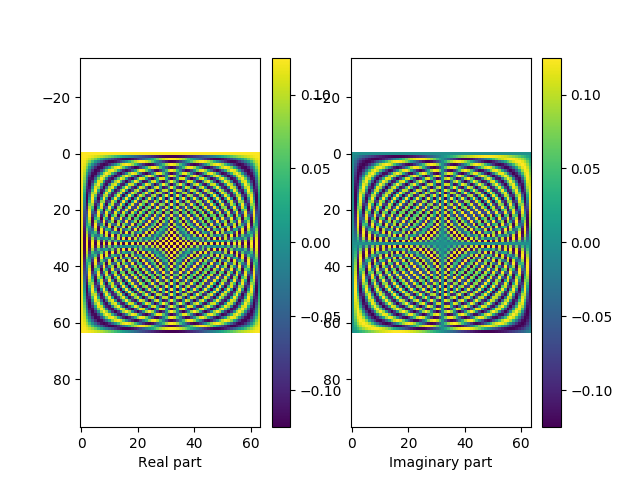

In [2]:
# DFT matrix of a 64-samples signal
F = dft_matrix_1d(64)
ims([F.real, F.imag], legend=["Real part", "Imaginary part"])

<IPython.core.display.Javascript object>


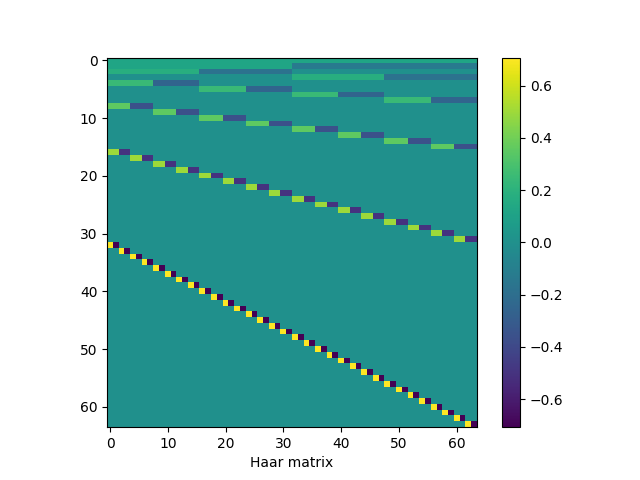

In [3]:
# DWT (Discret Wavelet Transform) of a 64-samples signal, for the Haar wavelet
W = build_wavelet_matrix_1d(64, wname="haar")
ims(W, legend="Haar matrix")

<IPython.core.display.Javascript object>


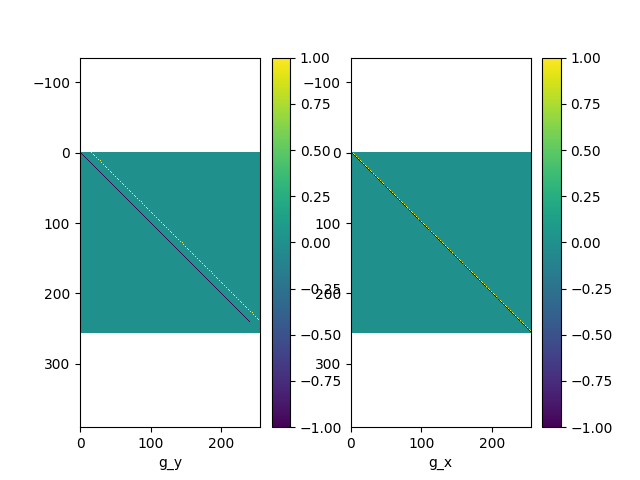

In [4]:
# Gradient of a 2D (16, 16) image
G = build_gradient_matrix_2d(16) # 2 components
ims(G, legend=["g_y", "g_x"])

In [13]:
# Tomography projection matrix (Discretized Radon Transform)
from projections import build_projection_operator
A = build_projection_operator(128, n_dir=80)
P = np.array(A.todense())

In [6]:
# ims(P, legend="Projection matrix")

### "Fourier and spikes are maximally incoherent"

This is the starting point of CS: the time-frequency duality is generalized by the concept of basis-coherence.

In [7]:
# DFT matrix of a (64, 64) image. This is a (4096, 4096) matrix !
F2 = dft_matrix_2d(64)

In [8]:
# Matrix of the natural basis: this is simply the identity.
print(coherence(F2, np.eye(64**2))) # 1 is the minimal possible result

1.0


### "Fourier and Wavelets are maximally coherent"

Authors often forget to mention that this only holds for the Haar wavelet !

In [11]:
W2 = build_wavelet_matrix_2d(128, wname="haar")

In [12]:
print(coherence(F2, W2)) # 64 = sqrt(64**2) is the maximum possible result

ValueError: shapes (4096,4096) and (16384,16384) not aligned: 4096 (dim 1) != 16384 (dim 0)

In [7]:
# Another matrix with the Daubechies-20 VM wavelet
W2_db5 = build_wavelet_matrix_2d(128, wname="db5")

In [19]:
print(coherence(F2, W2_db5)) # Try with others wavelets !

4.0


### "Noiselets and Wavelets are maximally incoherent"

More precisely, Noiselets and *Haar* wavelets are maximally incoherent (mu = 1) [4, 5, 6].

[4] https://statweb.stanford.edu/~candes/papers/PartialMeasurements.pdf

[5]  R. Coifman, F. Geshwind, and Y. Meyer. Noiselets. Appl. Comp. Harmonic Analysis, 10:27–44, 2001

[6] http://dsp.rice.edu/sites/dsp.rice.edu/files/cs/noiselets.pdf


In [20]:
N = build_noiselet(12) # 2**12 = 4096

In [21]:
print(coherence(N, W2))

1.0


What about other wavelets ?

In [22]:
print(coherence(N, W2_db5))

4.05776411231


Noiselets also seem to be incoherent with the standard ("Dirac spikes") basis:

In [23]:
print(coherence(N, np.eye(64**2)))

1.0


### What about tomography projector ?

We have to normalize the definition of coherence, as basis might not be orthonormal

In [18]:
def coherence_normalized(A, B):
    N = A.shape[1]
    A2 = np.linalg.norm(A, axis=1)
    B2 = np.linalg.norm(B, axis=1)
    # In case where a line of A or B is zero (happens only for gradient)
    A2[A2 == 0] = 1
    B2[B2 == 0] = 1
    return np.max(np.abs(A.dot(B.conj().T)/np.outer(A2,B2)))*sqrt(N)   # normalize by the product of the norms of the basis functions


In [15]:
print(coherence_normalized(P, W2))

25.5627626698


In [ ]:
print(coherence_normalized(P, W2_db5))

In [12]:
G = build_gradient_matrix_2d(128, merged=True) # merged to return both gradient components in a single matrix

In [13]:
print(coherence_normalized(P, G))

13.8933699298


In [29]:
print(coherence_normalized(P, N))

7.97409880549


In [14]:
print(coherence_normalized(P, np.eye(128**2)))

21.3671199463


In [15]:
W_coif1 = build_wavelet_matrix_2d(128, wname="coif1")
print(coherence_normalized(P, W_coif1))

34.1970694288


In [16]:
F2 = dft_matrix_2d(128)

In [19]:
print(coherence_normalized(P, F2))

16.6459898275


Now, if we *measure* the Fourier transform of the data, $\hat{d} = F d$:
$$
\amin{x}{  \frac{1}{2}\norm{F P x - \hat{d}}_2^2 + \lambda \norm{D x}_1  }
$$
This is not equivalent to $\amin{x}{  \frac{1}{2}\norm{F P x - F d}_2^2 + \lambda \norm{D x}_1  }$ (which is exactly the same as without $F$ since it is an unitary operator), as here we only know $\hat{d}$.

In [34]:
F1 = build_dft_matrix_2d_axis(80, 64)

NameError: name 'build_dft_matrix_2d_axis' is not defined

In [32]:
print(coherence_normalized(F1.conjugate().dot(P), G))

NameError: name 'F1' is not defined

In [27]:
print(coherence_normalized(F1.conjugate().dot(P), W2)) # F1 P  is "radial F2, and F2 is max. incoherent with W2 !

64.0


In [28]:
print(coherence_normalized(F1.conjugate().dot(P), W2_db5)) # surprising !

6.03533257966


Now if we have filtered data $\tilde{d} = H d$ where $H$ is a high-pass filter

In [32]:
def filter_projections(sino):
	nb_angles, l_x = sino.shape
	ramp = 1./l_x * np.hstack((np.arange(l_x), np.arange(l_x, 0, -1))) 
	return np.fft.ifft(ramp * np.fft.fft(sino, 2*l_x, axis=1), axis=1)[:, :l_x].real

def build_filter_matrix_2d(n, p):
    inp = np.zeros((n, p))
    res = np.zeros((n*p, n*p), dtype=np.float32)
    for i in range(n):
        for j in range(p):
            I = i*p+j # "ravel" index
            inp[i,j] = 1
            res[:, I] = filter_projections(inp).ravel()
            inp[i,j] = 0
    return res



In [33]:
H = build_filter_matrix_2d(80, 64)

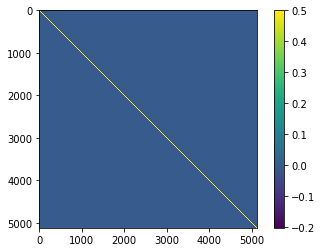

In [34]:
ims(H) # Toeplitz, self-adjoint

In [35]:
coherence_normalized(H.dot(P), G) # Gradient regularization will be less efficient with this high pass filter

13.801851553147639

In [38]:
coherence_normalized(H.dot(P), W2) # same for other sparsity-inducing transforms

17.164171366680314

In [39]:
coherence_normalized(H.dot(P), W2_db5)

17.142040515809999